# CLASSIFYING INCOME POTENTIAL FROM THE ADULT DATASET:


### COMPARING DIFFERENT UNDERSTANDING AND PREPROCESSING DATA

The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc.

Abstract. Adult dataset has 48842 instances and 15 attributes. The last one is the qualitative attribute which is called
‘income’ in the code. My job is to predict each adult’s income potential and classify them according to the
quantitative attributes. There are different methods and thoughts about the raw data (Reducing the training set,
normalizing, stratified sampling and deal with the categorical columns) influencing the final predicting results which
will be shown and compared in this paper. Some methods can improve the neural network but some are not
absolutely can, and the best result is better than those shown in the paper for the same dataset I choose (Vidya, Sejal
and Ronit).

The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:

Age.
Workclass.
Final Weight.
Education.
Education Number of Years.
Marital-status.
Occupation.
Relationship.
Race.
Sex.
Capital-gain.
Capital-loss.
Hours-per-week.
Native-country.
The dataset contains missing values that are marked with a question mark character (?).

There are a total of 48,842 rows of data, and 3,620 with missing values, leaving 45,222 complete rows.

There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.

‘>50K’: majority class, approximately 25%.
‘<=50K’: minority class, approximately 75%.
Given that the class imbalance is not severe and that both class labels are equally important, it is common to use classification accuracy or classification error to report model performance on this dataset.

Using predefined train and test sets, reported good classification error is approximately 14 percent or a classification accuracy of about 86 percent. This might provide a target to aim for when working on this dataset.

Below mentioned are the steps to be followed:

Part 1

Load the data
Understand and Viz the data
Missing value treatment
EDA
Data Preparation
Removing Outliers and uneccessary columns
Categorical variable treatment
Standardizing numerical variables
Train Test Split
Training the Model
Prediction
Making Predictions
Evaluation

Part 2 Automatic Feature Elimination using RFE

Part 3 Principal Component Analysis

In [197]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

Step 1: Load the data

In [199]:
df = pd.read_csv("adult.csv")

Step 2: Understand and Viz the data¶

In [200]:
# Looking at the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [201]:
df.shape

(48842, 15)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [203]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Observations:

In [204]:
df.isin(['?']).sum()


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [205]:
df.replace('?',np.nan,inplace=True)

In [206]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [207]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [208]:
df=df.dropna(axis=0)

In [209]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [210]:
num_attributes = df.select_dtypes(include = ['int64'])

In [211]:
num_attributes.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

### Univariant Analysis

Age Distribution:

<function matplotlib.pyplot.show(close=None, block=None)>

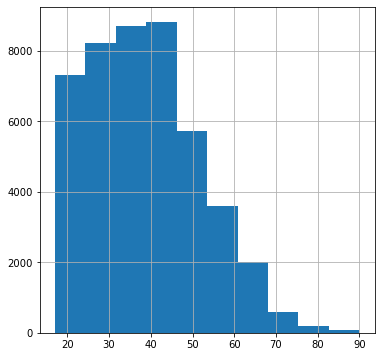

In [212]:
df['age'].hist(figsize = (6,6))
plt.show

By observation age attribute is right-skewed and not symetric. min and max age in btw 17 to 90.

### finalwieght Distribution:¶

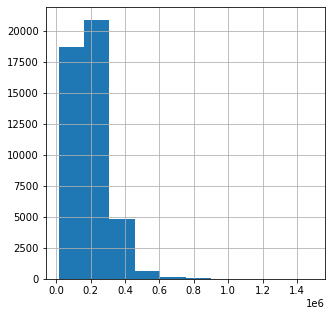

In [213]:
df['fnlwgt'].hist(figsize = (5,5))
plt.show()

The above plot is rightly skewed

### Capital Gain Distribution:

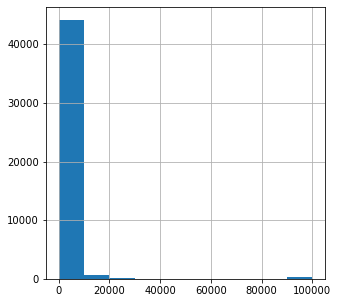

In [214]:
df['capital-gain'].hist(figsize=(5,5))
plt.show()

capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

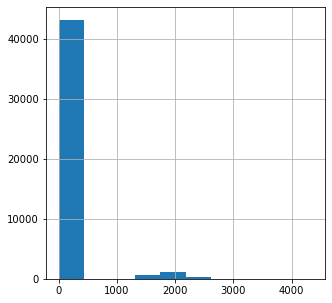

In [215]:
df['capital-loss'].hist(figsize=(5,5))
plt.show()

This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2282). This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 43000 of them)

### Relation btw in capital-gain and capital-loss

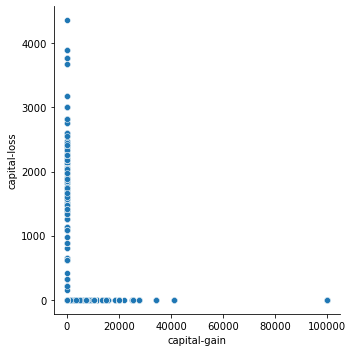

In [216]:
sns.relplot('capital-gain','capital-loss',data= df)
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()

1.both capital-gain and capital-loss can be zero(0) 2.if capital-gain is Zero then capital-loss being high or above zero. 3.if capital-loss is Zero then capital-gain being high or above zero.

### Hours-per-week Distribution:

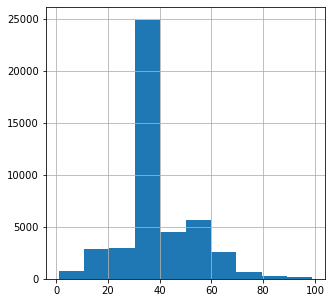

In [217]:
df['hours-per-week'].hist(figsize=(5,5))
plt.show()

### Income(TArget variable) Distribution:

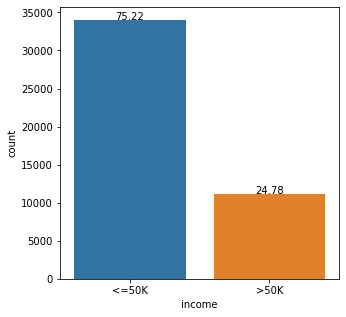

In [218]:
plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In this data the hours per week atrribute varies within the range of 1 to 99. By observayion,30-40 hrs people work per week,around 27000 people. There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

### Boxplot(workclass relationship with income):¶

Boxplot(Age relationship with income):

### Workclass Distribution:

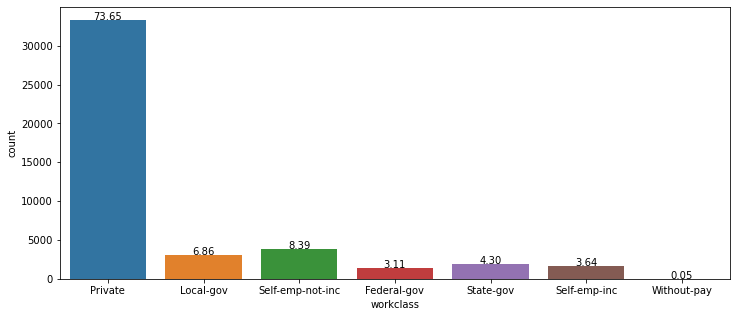

In [219]:

plt.figure(figsize=(12,5))

total = float(len(df['income']))

a = sns.countplot(x='workclass',data=df)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

most of them belong to private workclass that is around 75%. without-play and never-play workclass has min count

### Education Distribution:

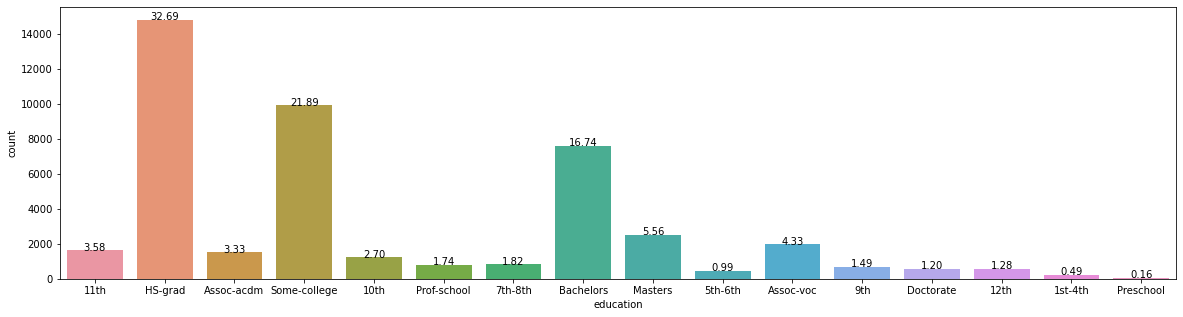

In [220]:
plt.figure(figsize=(20,5))

a= float(len(['income']))

a= sns.countplot(x='education',data=df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

Hs-grad has 32.32% of all the education attribute. pre-school has min

### marital-status Distribution:

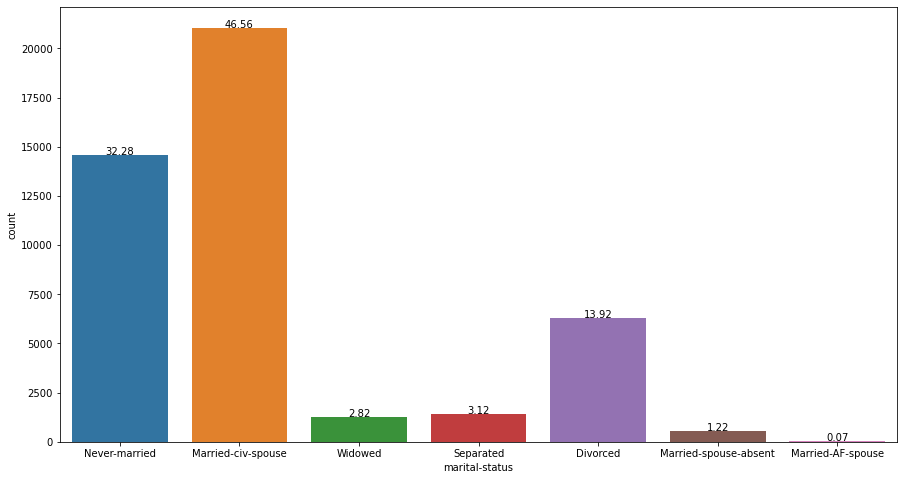

In [221]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital-status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Occupation Distribution:

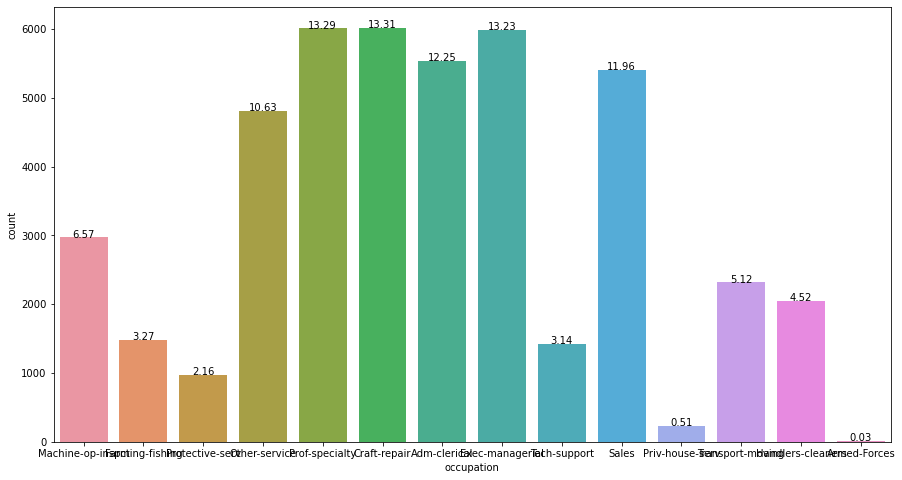

In [222]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="occupation", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Prof-specialty has the maximum count. Armed-Forces has minimum samples in the occupation attribute

### Race Distribution:

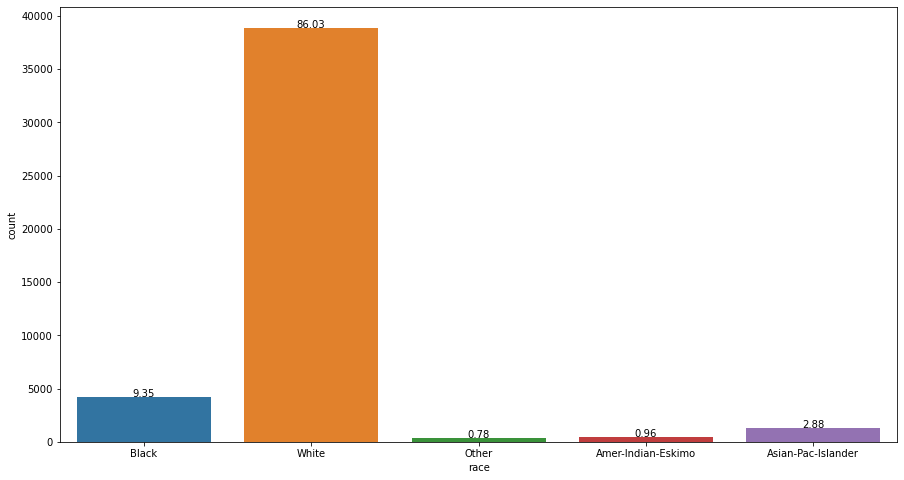

In [223]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

white is maximun among all about 85.50%. black is second maximun.

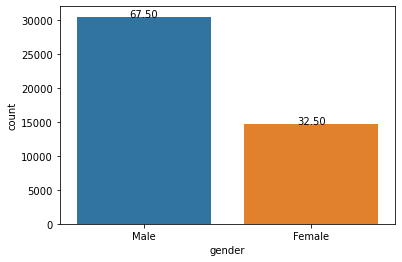

In [224]:
# plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="gender", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

there are 2 unique categories in gender. frequency of male is higher than female.

### Income(TArget variable) Distribution:¶

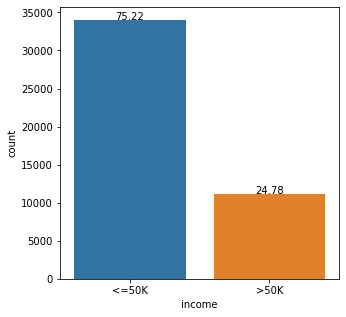

In [225]:
plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In income there is 2 group,group1(who earns more than 50k) 23.93% belong to income and group2(who earns less than 50k) 76% belong to income

### 2.Bivariate analysis

Boxplot(Age relationship with income):

<function matplotlib.pyplot.show(close=None, block=None)>

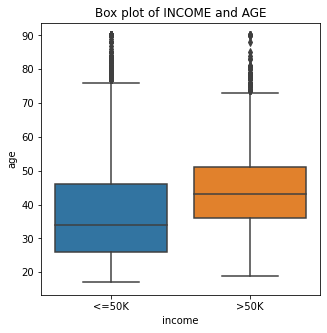

In [226]:
#Box plots
#--------------------------------------------------------------------------------
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of INCOME and AGE')
#blue_patch = mpatches.patch(color='blue',label='class_1')
#orange_patch = mpatches.patch(color='orange',label='class_2')
#plt.legend(handels=[blue_patch,orange_patch],loc=1)
plt.show

Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).

Boxplot(workclass relationship with income

Text(0.5, 1.0, 'workclass vs count')

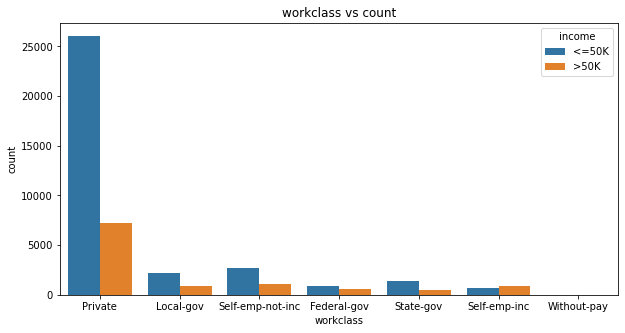

In [227]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=df).set_title("workclass vs count")

The data seems to mainly consist private employees.

In All the workclasses number of people earning less then 50k are more then those earning 50k.

### Boxplot (capital-gain Relationship with income):

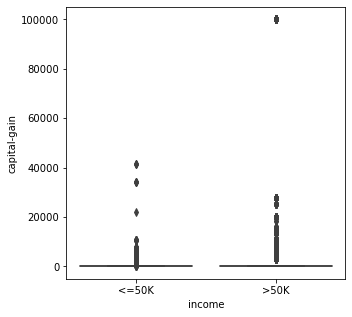

In [228]:
plt.figure(figsize=(5,5))
sns.boxplot(x="income", y="capital-gain", data=df)
plt.show()

Most of the capital gains value is accumulated at 0 for both the income group

### Boxplot (capital-loss Relationship with income):

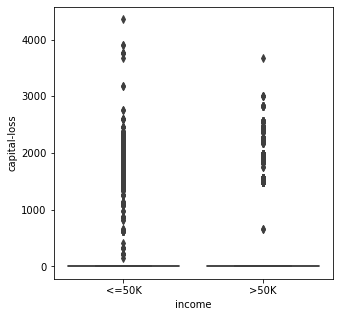

In [229]:
plt.figure(figsize=(5,5))
sns.boxplot(x="income", y="capital-loss", data=df)
plt.show()

This boxplot is similar to the capital gain boxplot where most of the values are concentrated on 0.

### Boxplot (relationship Relationship with income):

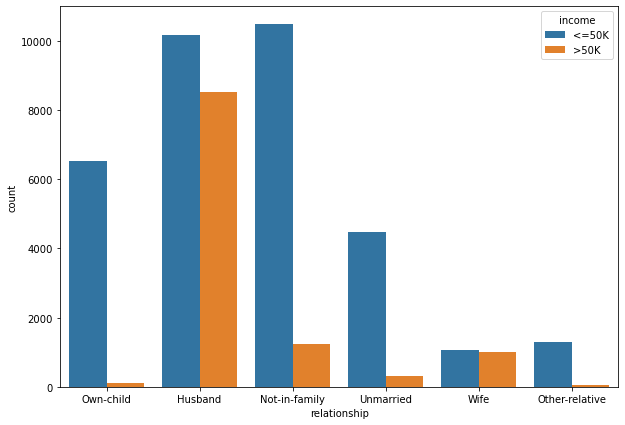

In [230]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",
            data=df);

Mostly a person with relation as husband in a family has most count of people with more then 50k income

### Boxplot (race Relationship with income):

<Figure size 1440x360 with 0 Axes>

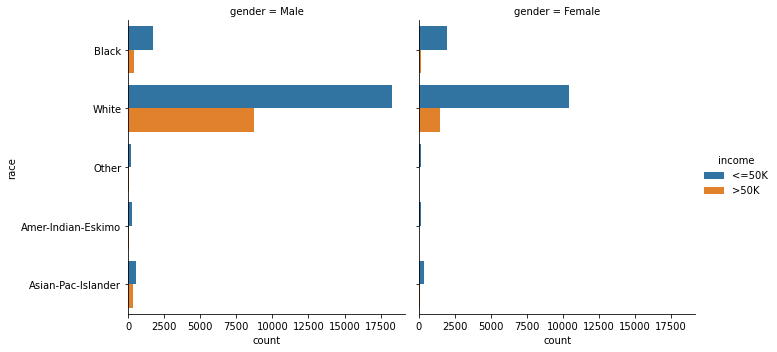

In [231]:
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df);

It is clear people with Gender male and race as white has the most people with income more then 50k.

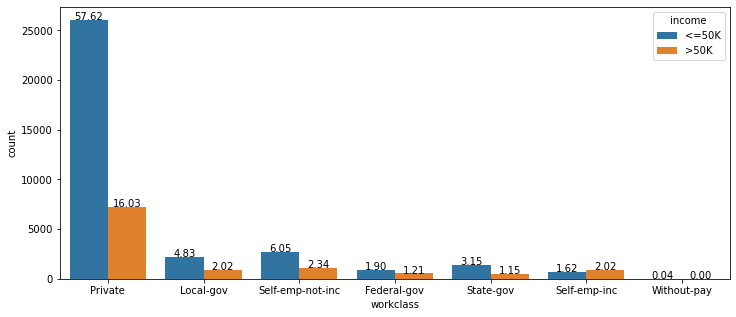

In [232]:
plt.figure(figsize=(12,5))
total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

NameError: name 'mpatches' is not defined

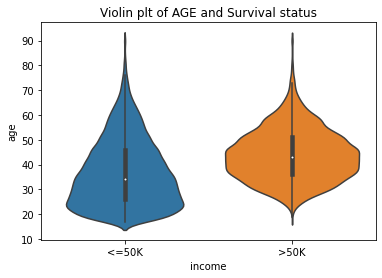

In [233]:
sns.violinplot(x="income", y="age", data=df, size=8)
plt.title('Violin plt of AGE and Survival status')
blue_patch = mpatches.Patch(color='blue', label='class_1')
orange_patch = mpatches.Patch(color='orange', label='class_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()

by observation of violin plot. This plot gives the combined information of PDF and box plot. The curve denotes the PDF and middle area denotes box plot.

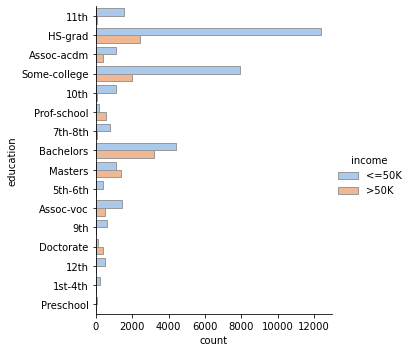

In [234]:
sns.catplot(y="education", hue="income", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

This data mostly consist of people who has education as hs-grad

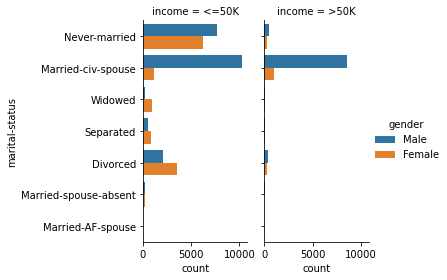

In [235]:
ct = sns.catplot(y='marital-status',hue='gender',col='income',data=df,kind='count',
                height=4,aspect=.7)

The people with marital status as Married-civ-spouce has highest people with income more then 50k.

<AxesSubplot:xlabel='count', ylabel='occupation'>

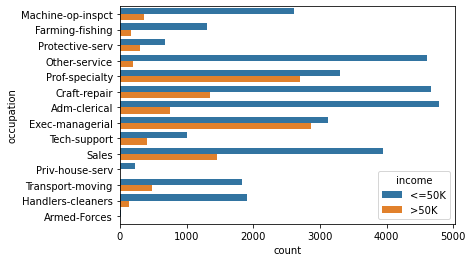

In [236]:
sns.countplot(y="occupation", hue="income",
            data=df)

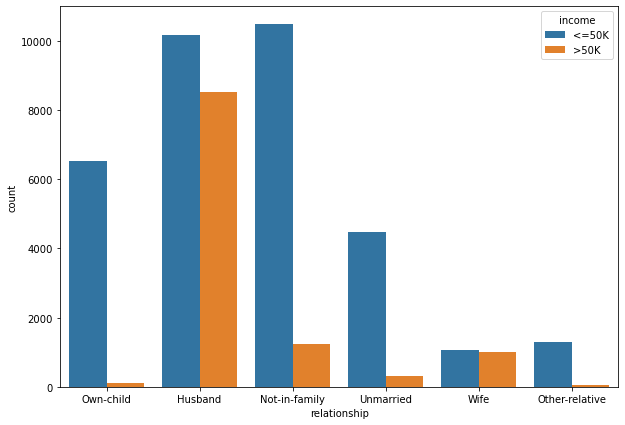

In [237]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",
            data=df);

<Figure size 1440x504 with 0 Axes>

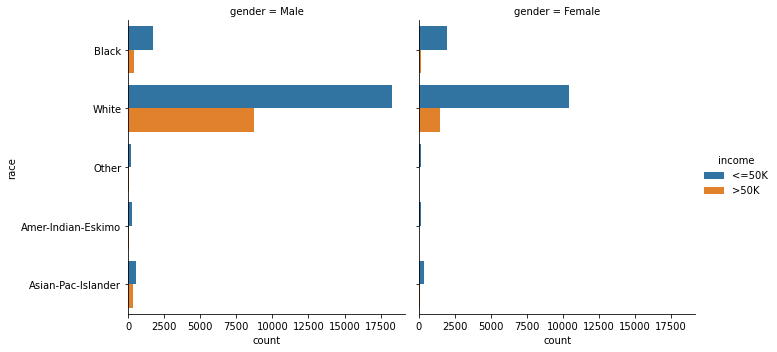

In [238]:
plt.figure(figsize=(20,7))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df);

<AxesSubplot:>

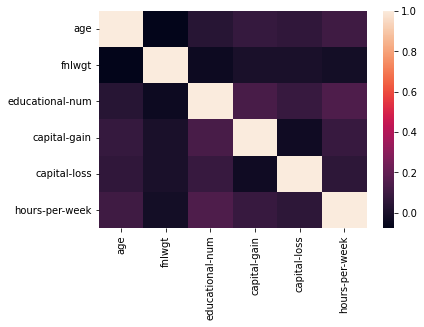

In [239]:
sns.heatmap(df.corr())

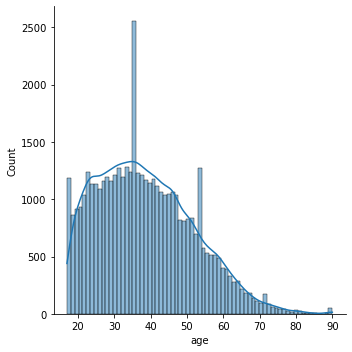

In [240]:
sns.displot(data = num_attributes, x = 'age',kde = True)

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

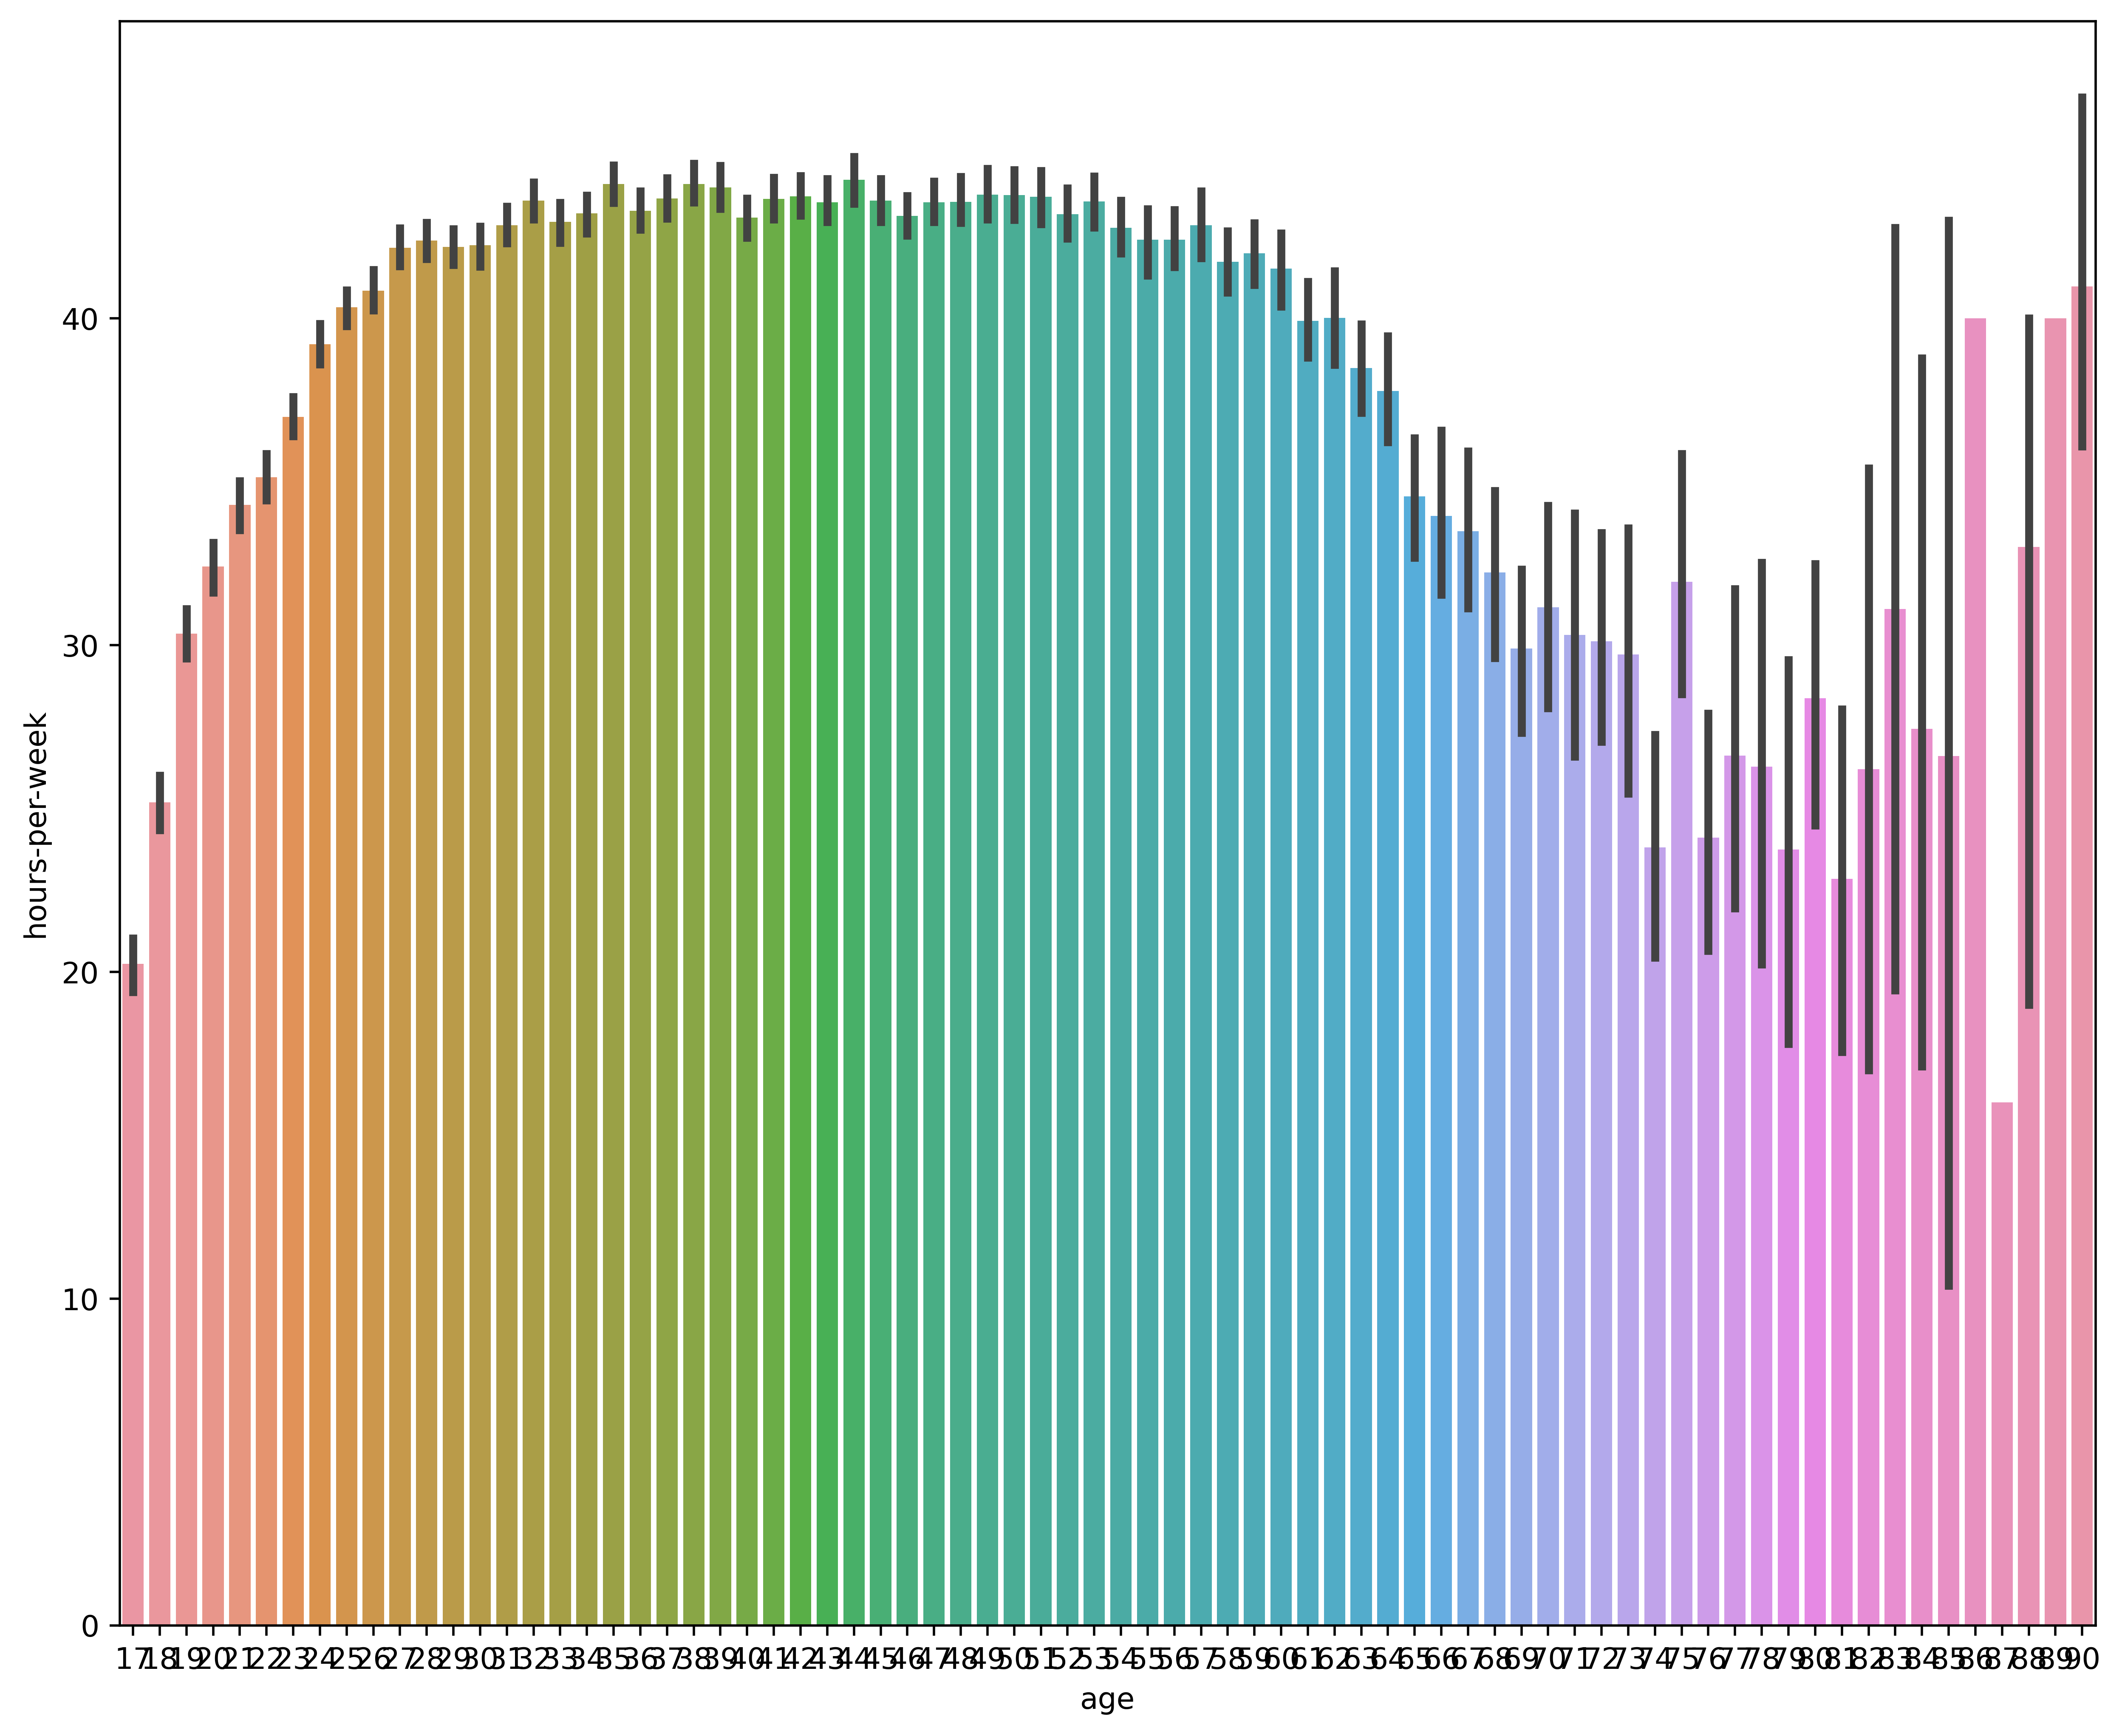

In [241]:
plt.figure(dpi = 500,figsize = (12,10))
sns.barplot(x = 'age', y = 'hours-per-week', data = num_attributes)

<AxesSubplot:xlabel='age', ylabel='capital-gain'>

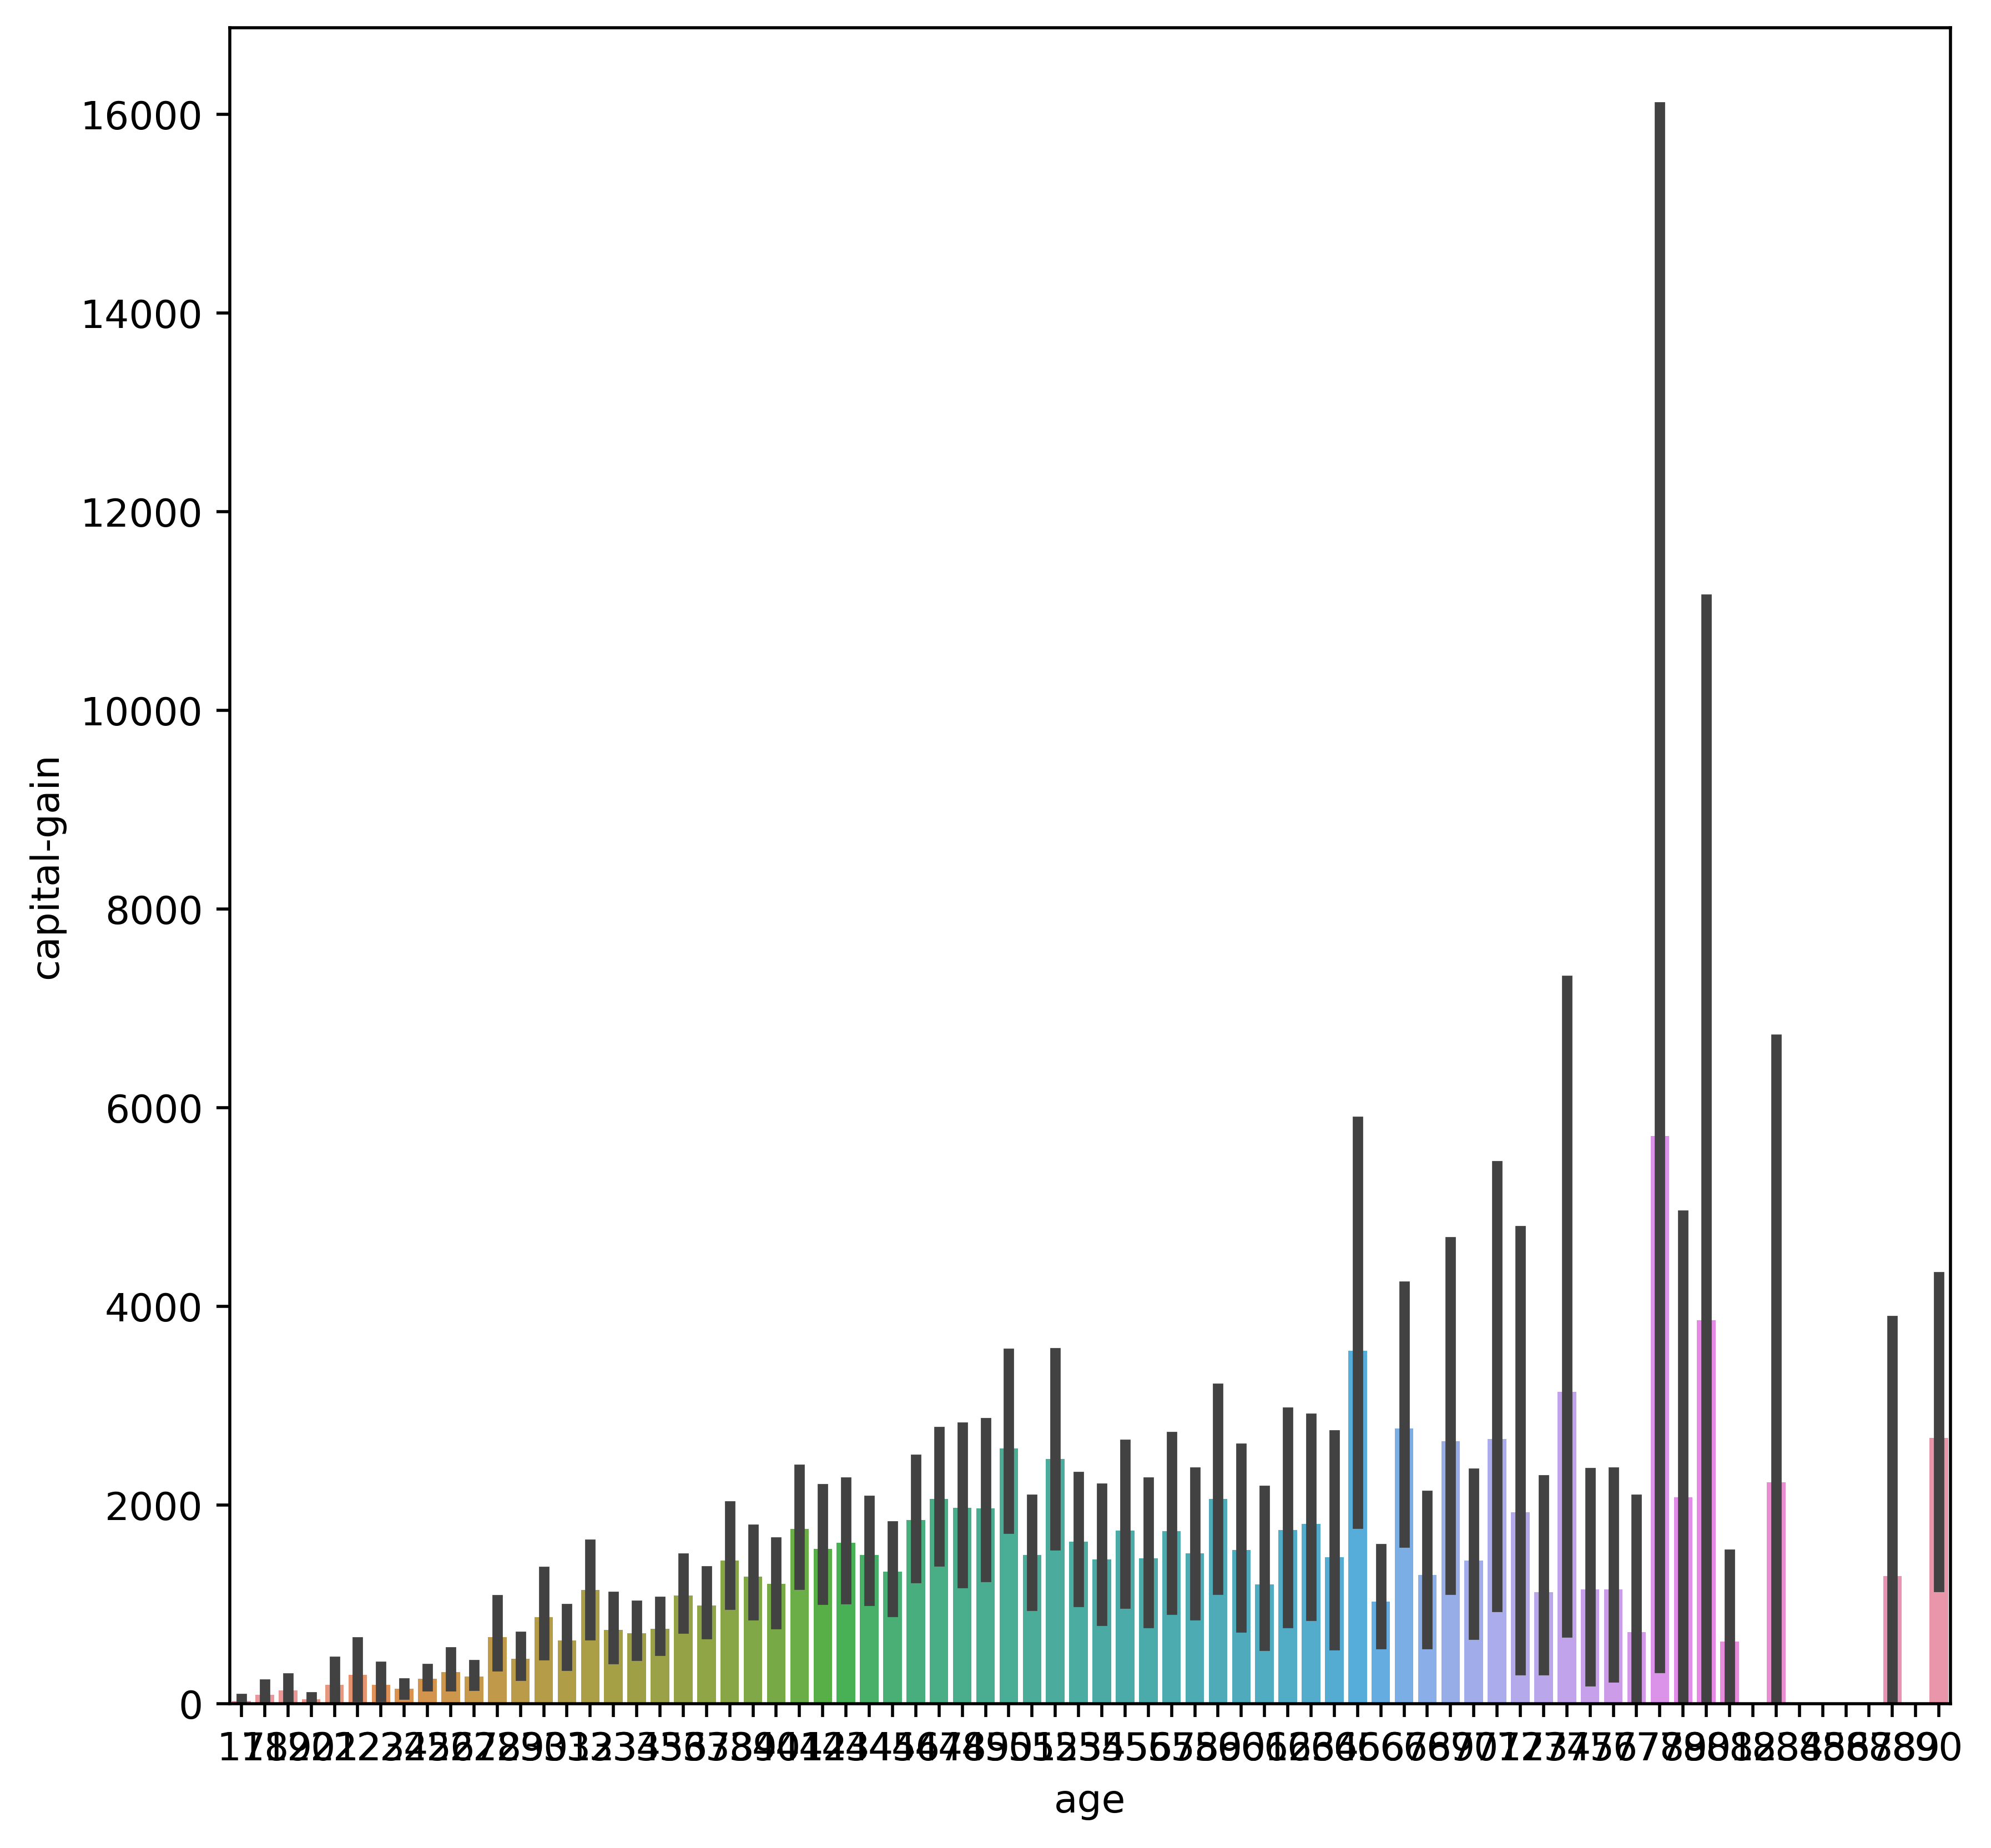

In [242]:
plt.figure(dpi = 500,figsize = (8,8))
sns.barplot(x = 'age', y = 'capital-gain', data = num_attributes)

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

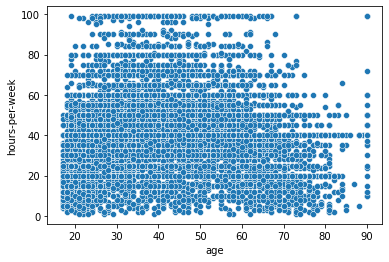

In [243]:
sns.scatterplot(x='age',y='hours-per-week',data=num_attributes)

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

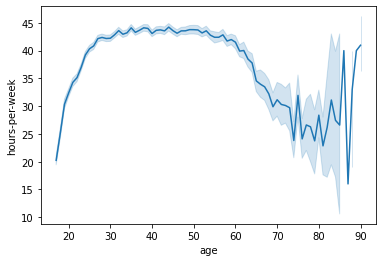

In [244]:
sns.lineplot(x='age',y='hours-per-week',data=num_attributes)

<AxesSubplot:ylabel='None'>

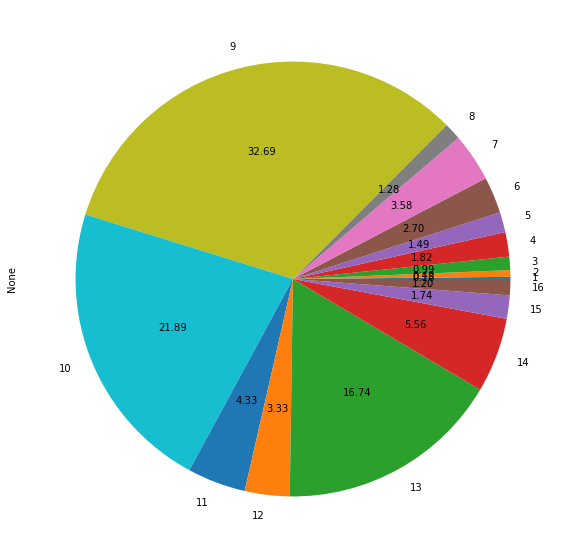

In [245]:
plt.figure(figsize=(10,10))
num_attributes.groupby('educational-num').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

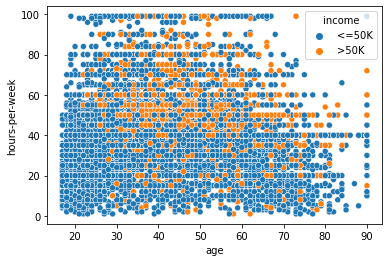

In [246]:
sns.scatterplot(x='age',y='hours-per-week',data=df,hue ='income')

In [247]:
num_attributes.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

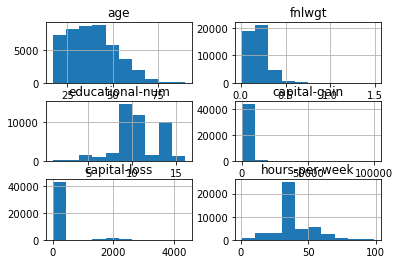

In [248]:

num_attributes.hist()
plt.show()

<AxesSubplot:xlabel='age', ylabel='educational-num'>

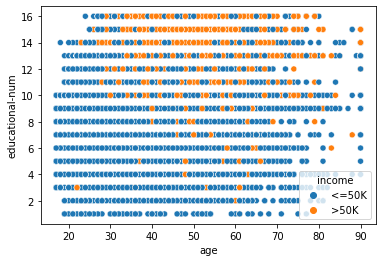

In [249]:
sns.scatterplot(x='age',y='educational-num',data=df,hue ='income')

<AxesSubplot:xlabel='age', ylabel='capital-gain'>

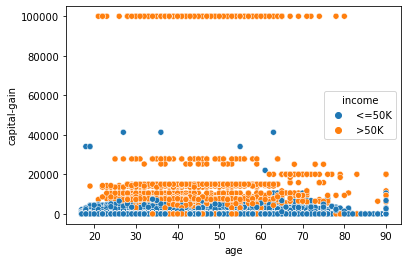

In [250]:
sns.scatterplot(x='age',y='capital-gain',data=df,hue ='income')

<AxesSubplot:xlabel='age', ylabel='capital-loss'>

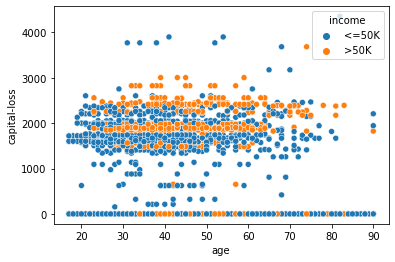

In [251]:
sns.scatterplot(x='age',y='capital-loss',data=df,hue ='income')

<AxesSubplot:xlabel='age', ylabel='educational-num'>

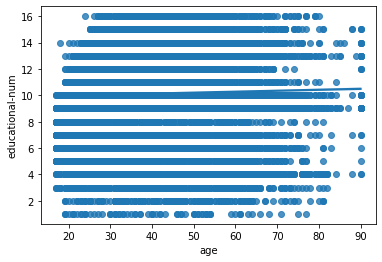

In [252]:
sns.regplot(x="age", y="educational-num", data=df)

In [253]:
cat_attributes = df.select_dtypes(include = ['object'])

In [254]:
cat_attributes.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='education'>

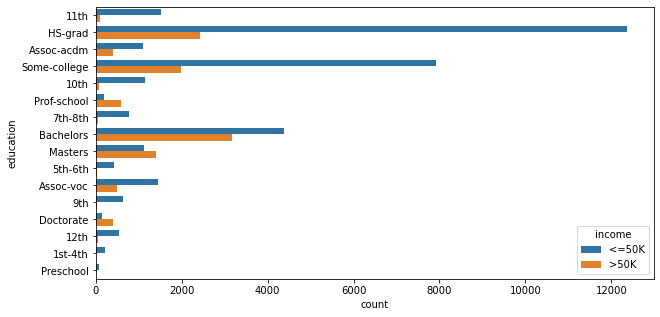

In [255]:
plt.figure(figsize = (10,5))

sns.countplot(data = cat_attributes, y = 'education', hue = 'income')

<AxesSubplot:xlabel='count', ylabel='workclass'>

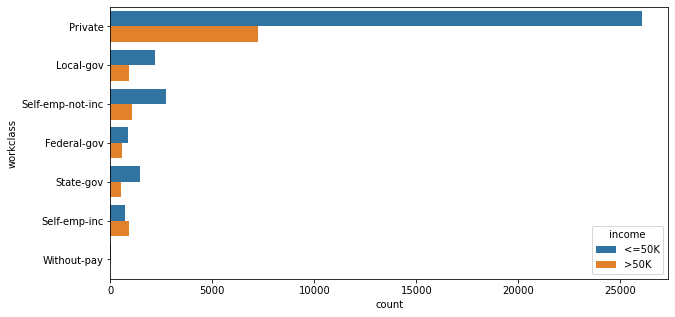

In [256]:
plt.figure(figsize = (10,5))

sns.countplot(data = cat_attributes, y = 'workclass', hue = 'income')

In [257]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [258]:
df.pivot_table(values=['income'],index = ['race','gender'], aggfunc = 'count')

income
race               gender        
Amer-Indian-Eskimo Female     166
                   Male       269
Asian-Pac-Islander Female     436
                   Male       867
Black              Female    2084
                   Male      2144
Other              Female     126
                   Male       227
White              Female   11883
                   Male     27020

<AxesSubplot:xlabel='age'>

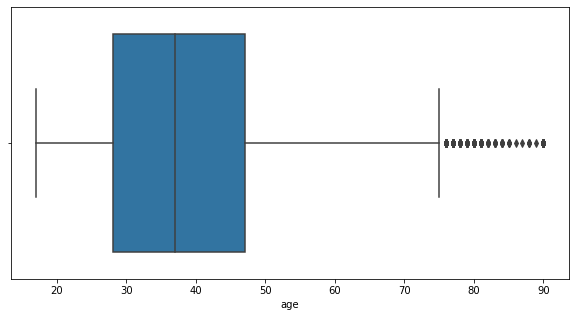

In [259]:
plt.figure(figsize = (10,5))

sns.boxplot(data = df, x = 'age')

<AxesSubplot:xlabel='hours-per-week', ylabel='gender'>

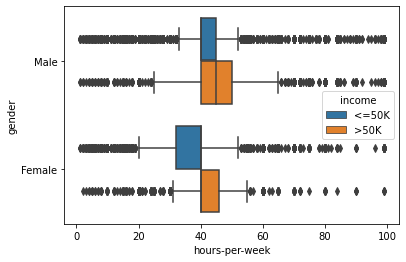

In [260]:
sns.boxplot(data = df, x = 'hours-per-week', y = 'gender', hue = 'income')

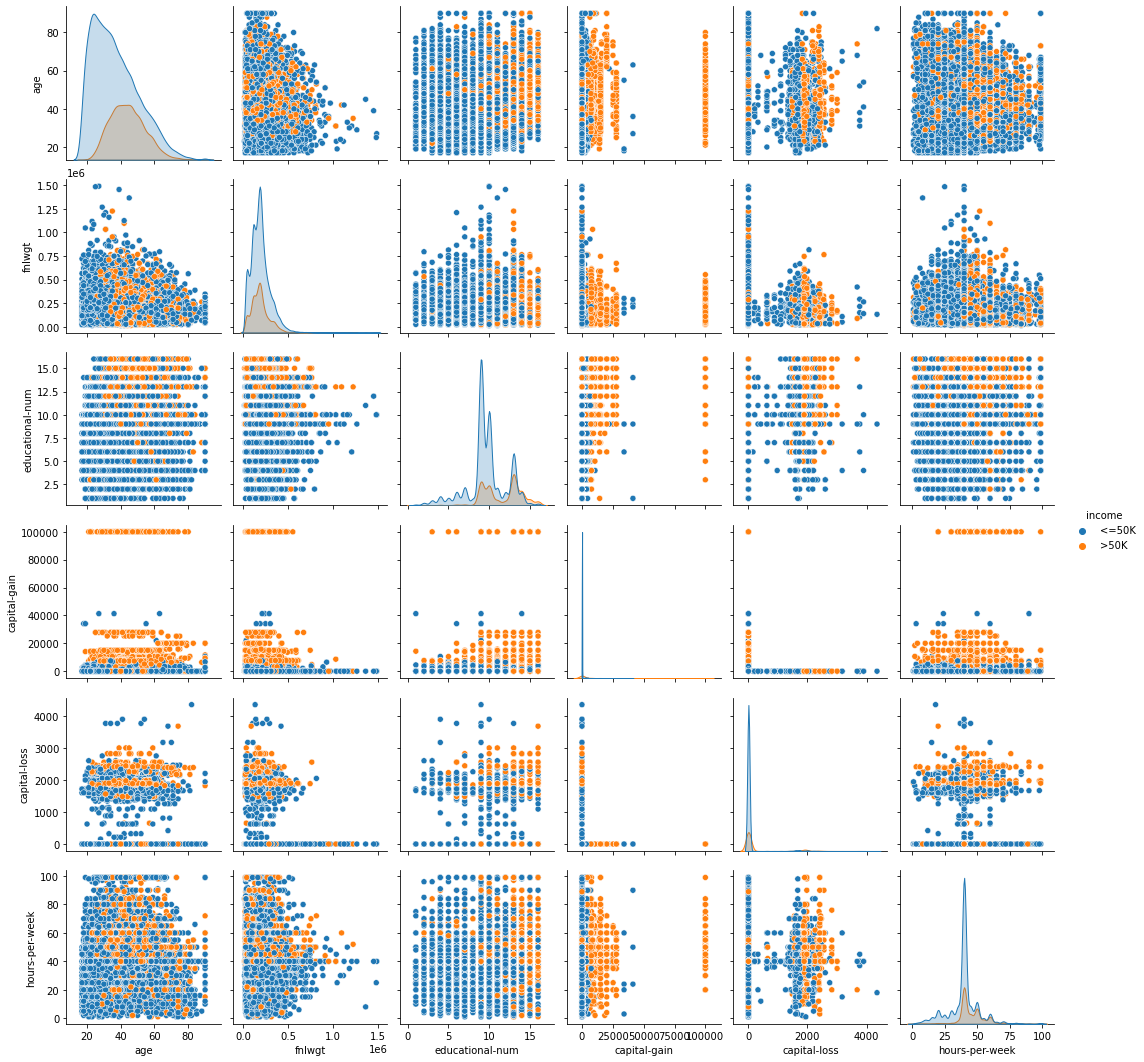

In [261]:
sns.pairplot(df, hue = 'income')

In [262]:
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [265]:
import numpy as np
import scipy.stats as stats

In [266]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Step-5:Find and treat the outliers and missing values in each column

Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

CAUSE FOR OUTLIERS
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

DIFFERENT OUTLIER DETECTION TECHNIQUE.
1. Hypothesis Testing
2. Z-score method
3. Robust Z-score
4. I.Q.R method
5. Winsorization method(Percentile Capping)
6. DBSCAN Clustering
7. Isolation Forest
8. Visualizing the data

1. HYPOTHESIS TESTING(GRUBBS TEST)
 Grubbs' test is defined for the hypothesis:  Ho:  There are no outliers in the data set H1: There is exactly one outlier in the data set 
 
The Grubbs' test statistic is defined as: Gcalculated=max∣∣Xi−X¯¯¯¯¯∣∣SD with X¯¯¯¯ and SD denoting the sample mean and standard deviation, respectively. 
Gcritical=(N−1)N−−√(tα/(2N),N−2)2N−2+(tα/(2N),N−2)2−−−−−−−−−−−−−−−−−−⎷
 
 If the calculated value is greater than critical, you can reject the null hypothesis and conclude that one of the values is an outlier 

In [267]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")


In [268]:
grubbs_test(df['age'])

Grubbs Calculated Value: 3.89265643952121
Grubbs Critical Value: 4.871224215432282
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers



In [269]:
grubbs_test(df['fnlwgt'])

Grubbs Calculated Value: 12.312472138449536
Grubbs Critical Value: 4.871224215432282
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



In [270]:
grubbs_test(df['educational-num'])

Grubbs Calculated Value: 3.5718704339569904
Grubbs Critical Value: 4.871224215432282
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers



### 2. Z-SCORE METHOD
Using Z score method,we can find out how many standard deviations value away from the mean.



Figure in the left shows area under normal curve and how much area that standard deviation covers.
* 68% of the data points lie between + or - 1 standard deviation.
* 95% of the data points lie between + or - 2 standard deviation
* 99.7% of the data points lie between + or - 3 standard deviation
Z-score formula
Zscore=X−MeanStandardDeviation
 
If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. It is taken as outliers.

In [271]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)

In [272]:
Zscore_outlier(df['age'])

Outliers: [80, 90, 80, 81, 82, 81, 85, 80, 90, 81, 89, 83, 81, 82, 80, 90, 81, 83, 90, 90, 80, 80, 81, 90, 85, 90, 81, 81, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 79, 81, 81, 90, 82, 90, 81, 88, 80, 81, 80, 81, 90, 84, 80, 80, 83, 79, 79, 90, 81, 90, 88, 90, 90, 80, 90, 81, 81, 80, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 79, 85, 82, 79, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 80, 79, 80, 79, 80, 90, 90, 90, 81, 83, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 79, 81, 88, 90, 82, 88, 83, 79, 86, 90, 82, 83, 81, 79, 84, 84, 79, 90, 80, 81, 81, 90, 80, 82, 90, 90, 85]


In [273]:
Zscore_outlier(df['educational-num'])

Outliers: [80, 90, 80, 81, 82, 81, 85, 80, 90, 81, 89, 83, 81, 82, 80, 90, 81, 83, 90, 90, 80, 80, 81, 90, 85, 90, 81, 81, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 79, 81, 81, 90, 82, 90, 81, 88, 80, 81, 80, 81, 90, 84, 80, 80, 83, 79, 79, 90, 81, 90, 88, 90, 90, 80, 90, 81, 81, 80, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 79, 85, 82, 79, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 80, 79, 80, 79, 80, 90, 90, 90, 81, 83, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 79, 81, 88, 90, 82, 88, 83, 79, 86, 90, 82, 83, 81, 79, 84, 84, 79, 90, 80, 81, 81, 90, 80, 82, 90, 90, 85, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [274]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [275]:
Zscore_outlier(df['capital-loss'])

Outliers: [80, 90, 80, 81, 82, 81, 85, 80, 90, 81, 89, 83, 81, 82, 80, 90, 81, 83, 90, 90, 80, 80, 81, 90, 85, 90, 81, 81, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 79, 81, 81, 90, 82, 90, 81, 88, 80, 81, 80, 81, 90, 84, 80, 80, 83, 79, 79, 90, 81, 90, 88, 90, 90, 80, 90, 81, 81, 80, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 79, 85, 82, 79, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 80, 79, 80, 79, 80, 90, 90, 90, 81, 83, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 79, 81, 88, 90, 82, 88, 83, 79, 86, 90, 82, 83, 81, 79, 84, 84, 79, 90, 80, 81, 81, 90, 80, 82, 90, 90, 85, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [276]:
Zscore_outlier(df['capital-gain'])

Outliers: [80, 90, 80, 81, 82, 81, 85, 80, 90, 81, 89, 83, 81, 82, 80, 90, 81, 83, 90, 90, 80, 80, 81, 90, 85, 90, 81, 81, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 79, 81, 81, 90, 82, 90, 81, 88, 80, 81, 80, 81, 90, 84, 80, 80, 83, 79, 79, 90, 81, 90, 88, 90, 90, 80, 90, 81, 81, 80, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 79, 85, 82, 79, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 80, 79, 80, 79, 80, 90, 90, 90, 81, 83, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 79, 81, 88, 90, 82, 88, 83, 79, 86, 90, 82, 83, 81, 79, 84, 84, 79, 90, 80, 81, 81, 90, 80, 82, 90, 90, 85, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2

### 3. ROBUST Z-SCORE


It is also called as Median absolute deviation method. It is similar to Z-score method with some changes in parameters. Since mean and standard deviations are heavily influenced by outliers, alter to this parameters we use median and absolute deviation from median.
Robust Z-score formula
R.Z.score=0.6745∗(Xi−Median)MAD
 
Where MAD = median(|X-median|)
Suppose x follows a standard normal distribution. The MAD will converge to the median of the half normal distribution, which is the 75% percentile of a normal distribution, and N(0.75)≃0.6745.

In [277]:
out=[]
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)

In [278]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [279]:
ZRscore_outlier(df['capital-gain'])

Outliers: [7688, 3103, 6418, 3103, 7298, 7688, 3908, 14084, 3103, 5178, 15024, 15024, 5178, 2597, 7688, 15024, 2907, 4650, 15024, 6497, 7688, 15024, 5013, 4650, 3103, 15024, 27828, 3103, 4934, 4064, 3674, 2174, 10605, 99999, 5178, 99999, 1055, 99999, 114, 2580, 3411, 2174, 2907, 4508, 27828, 4386, 15024, 15024, 2174, 5178, 8614, 7298, 3103, 13550, 2907, 5013, 6497, 7298, 7298, 7298, 7298, 15024, 1055, 15024, 6849, 2463, 7688, 5013, 99999, 2580, 2174, 99999, 3137, 2885, 2964, 7298, 1471, 5013, 4064, 10566, 2463, 2354, 7688, 1424, 99999, 5178, 1455, 7688, 7688, 3325, 3103, 4416, 15024, 27828, 25236, 3674, 3137, 99999, 8614, 7298, 4787, 2829, 7298, 4865, 15024, 15024, 1264, 15024, 6849, 15024, 7298, 7688, 1506, 99999, 4386, 99999, 99999, 5013, 4650, 3908, 594, 4386, 7688, 15024, 99999, 27828, 10520, 2354, 7298, 15024, 4934, 15024, 5178, 3103, 99999, 4865, 7688, 7688, 3464, 10520, 20051, 4101, 8614, 3325, 1797, 7688, 3137, 3325, 15024, 2829, 3464, 2407, 594, 7298, 4416, 7688, 3471, 1055, 5

In [280]:
ZRscore_outlier(df['age'])

Outliers: [7688, 3103, 6418, 3103, 7298, 7688, 3908, 14084, 3103, 5178, 15024, 15024, 5178, 2597, 7688, 15024, 2907, 4650, 15024, 6497, 7688, 15024, 5013, 4650, 3103, 15024, 27828, 3103, 4934, 4064, 3674, 2174, 10605, 99999, 5178, 99999, 1055, 99999, 114, 2580, 3411, 2174, 2907, 4508, 27828, 4386, 15024, 15024, 2174, 5178, 8614, 7298, 3103, 13550, 2907, 5013, 6497, 7298, 7298, 7298, 7298, 15024, 1055, 15024, 6849, 2463, 7688, 5013, 99999, 2580, 2174, 99999, 3137, 2885, 2964, 7298, 1471, 5013, 4064, 10566, 2463, 2354, 7688, 1424, 99999, 5178, 1455, 7688, 7688, 3325, 3103, 4416, 15024, 27828, 25236, 3674, 3137, 99999, 8614, 7298, 4787, 2829, 7298, 4865, 15024, 15024, 1264, 15024, 6849, 15024, 7298, 7688, 1506, 99999, 4386, 99999, 99999, 5013, 4650, 3908, 594, 4386, 7688, 15024, 99999, 27828, 10520, 2354, 7298, 15024, 4934, 15024, 5178, 3103, 99999, 4865, 7688, 7688, 3464, 10520, 20051, 4101, 8614, 3325, 1797, 7688, 3137, 3325, 15024, 2829, 3464, 2407, 594, 7298, 4416, 7688, 3471, 1055, 5

### 4. IQR METHOD

In this method by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers

* Q1 represents the 1st quartile/25th percentile of the data.
* Q2 represents the 2nd quartile/median/50th percentile of the data.
* Q3 represents the 3rd quartile/75th percentile of the data.
* (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represnt the largest value in the data set.

out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)

In [281]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)

In [282]:
iqr_outliers(df['age'])

Outliers: [80, 90, 80, 77, 81, 78, 82, 81, 85, 77, 78, 77, 80, 77, 90, 76, 81, 77, 77, 77, 76, 76, 76, 77, 89, 77, 77, 78, 76, 77, 77, 83, 81, 76, 82, 80, 90, 81, 77, 83, 90, 90, 78, 80, 76, 77, 76, 80, 76, 81, 90, 76, 76, 85, 90, 81, 81, 80, 77, 78, 79, 81, 80, 88, 87, 76, 90, 78, 76, 77, 79, 83, 79, 80, 79, 81, 78, 81, 76, 90, 76, 82, 77, 76, 90, 81, 88, 80, 81, 80, 81, 76, 77, 90, 77, 84, 80, 80, 83, 79, 79, 76, 90, 77, 76, 81, 78, 90, 88, 90, 77, 90, 77, 78, 80, 90, 81, 81, 76, 80, 90, 76, 79, 76, 81, 76, 90, 90, 80, 90, 90, 79, 78, 79, 84, 90, 77, 80, 77, 90, 81, 83, 84, 79, 76, 85, 82, 79, 77, 90, 76, 90, 84, 78, 78, 76, 80, 90, 90, 77, 76, 84, 76, 90, 76, 90, 76, 77, 90, 77, 78, 77, 81, 78, 82, 81, 77, 76, 80, 90, 80, 84, 82, 78, 79, 76, 90, 84, 90, 83, 78, 80, 77, 78, 76, 79, 80, 79, 80, 90, 90, 90, 81, 76, 83, 90, 90, 81, 80, 80, 90, 79, 77, 77, 80, 76, 82, 85, 80, 79, 90, 76, 76, 77, 76, 79, 81, 77, 88, 90, 82, 76, 88, 76, 77, 83, 76, 77, 79, 77, 86, 90, 77, 82, 83, 81, 76, 7

In [283]:
iqr_outliers(df['hours-per-week'])

Outliers: [80, 90, 80, 77, 81, 78, 82, 81, 85, 77, 78, 77, 80, 77, 90, 76, 81, 77, 77, 77, 76, 76, 76, 77, 89, 77, 77, 78, 76, 77, 77, 83, 81, 76, 82, 80, 90, 81, 77, 83, 90, 90, 78, 80, 76, 77, 76, 80, 76, 81, 90, 76, 76, 85, 90, 81, 81, 80, 77, 78, 79, 81, 80, 88, 87, 76, 90, 78, 76, 77, 79, 83, 79, 80, 79, 81, 78, 81, 76, 90, 76, 82, 77, 76, 90, 81, 88, 80, 81, 80, 81, 76, 77, 90, 77, 84, 80, 80, 83, 79, 79, 76, 90, 77, 76, 81, 78, 90, 88, 90, 77, 90, 77, 78, 80, 90, 81, 81, 76, 80, 90, 76, 79, 76, 81, 76, 90, 90, 80, 90, 90, 79, 78, 79, 84, 90, 77, 80, 77, 90, 81, 83, 84, 79, 76, 85, 82, 79, 77, 90, 76, 90, 84, 78, 78, 76, 80, 90, 90, 77, 76, 84, 76, 90, 76, 90, 76, 77, 90, 77, 78, 77, 81, 78, 82, 81, 77, 76, 80, 90, 80, 84, 82, 78, 79, 76, 90, 84, 90, 83, 78, 80, 77, 78, 76, 79, 80, 79, 80, 90, 90, 90, 81, 76, 83, 90, 90, 81, 80, 80, 90, 79, 77, 77, 80, 76, 82, 85, 80, 79, 90, 76, 76, 77, 76, 79, 81, 77, 88, 90, 82, 76, 88, 76, 77, 83, 76, 77, 79, 77, 86, 90, 77, 82, 83, 81, 76, 7

### 5. WINSORIZATION METHOD(PERCENTILE CAPPING)


This method is similar to IQR method. If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.


In [284]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)

In [285]:
Winsorization_outliers(df['age'])

Outliers: [80, 90, 80, 77, 81, 74, 78, 82, 74, 75, 74, 81, 85, 77, 74, 78, 77, 80, 77, 74, 74, 90, 74, 76, 81, 77, 77, 77, 76, 74, 76, 76, 77, 89, 74, 74, 74, 74, 77, 75, 77, 78, 76, 77, 75, 77, 83, 81, 76, 82, 80, 90, 81, 77, 83, 75, 90, 90, 78, 80, 76, 77, 76, 75, 80, 76, 75, 81, 90, 76, 76, 74, 85, 90, 81, 81, 74, 80, 77, 78, 79, 81, 75, 80, 88, 87, 76, 74, 90, 78, 76, 77, 79, 83, 79, 75, 74, 80, 75, 79, 74, 81, 78, 75, 81, 76, 75, 74, 90, 74, 76, 74, 74, 82, 77, 76, 75, 75, 90, 75, 81, 88, 75, 80, 81, 80, 81, 76, 77, 90, 75, 77, 75, 75, 75, 84, 80, 80, 83, 79, 79, 76, 90, 75, 77, 76, 74, 81, 78, 90, 88, 75, 90, 77, 75, 75, 74, 90, 74, 77, 74, 78, 80, 90, 81, 75, 75, 74, 74, 81, 76, 75, 80, 75, 90, 76, 75, 79, 76, 81, 75, 76, 90, 90, 80, 90, 90, 74, 79, 78, 79, 84, 90, 77, 75, 74, 80, 75, 77, 90, 75, 81, 83, 74, 84, 79, 76, 85, 82, 79, 77, 90, 76, 90, 74, 84, 78, 78, 76, 80, 90, 74, 74, 90, 77, 76, 74, 74, 84, 75, 76, 74, 90, 76, 90, 76, 75, 74, 77, 90, 77, 78, 77, 81, 75, 75, 74, 7

### 6. DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)

DBSCAN is a density based clustering algorithm that divides a dataset into subgroups of high density regions and identifies high density regions cluster as outliers. Here cluster -1 indicates that the cluster contains outlier and rest of clusters have no outliers. This approch is similar to the K-mean clustering. There are two parameters required for DBSCAN. DBSCAN give best result for multivariate outlier detection.
1. epsilon: a distance parameter that defines the radius to search for nearby neighbors.
2. minimum amount of points required to form a cluster.

Using epsilon and minPts, we can classify each data point as:
Core point –> a point that has at least a minimum number of other points (minPts) within its radius.
Border point –> a point is within the radius of a core point but has less than the minimum number of other points (minPts) within its own radius.
Noise point –> a point that is neither a core point or a border point

In [286]:
from sklearn.cluster import DBSCAN
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))

In [287]:
DB_outliers(df['age'])

0    45222
Name: cluster, dtype: int64


### 7. ISOLATION FOREST

It is an clustering algorithm that belongs to the ensemble decision trees family and is similar in principle to Random Forest.

1. It classify the data point to outlier and not outliers and works great with very high dimensional data.
2. It works based on decision tree and it isolate the outliers.
3. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier.

In [288]:
from sklearn.ensemble import IsolationForest

In [289]:
def Iso_outliers(df):
    iso = IsolationForest(  random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))

In [290]:
Iso_outliers(df['age']) 

 1    32877
-1    12345
Name: cluster, dtype: int64


### 8. VISUALIZING THE DATA

Data visualization is useful for data cleaning, exploring data, detecting outliers and unusual groups, identifying trends and clusters etc. Here the list of data visualization plots to spot the outliers.
1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot.

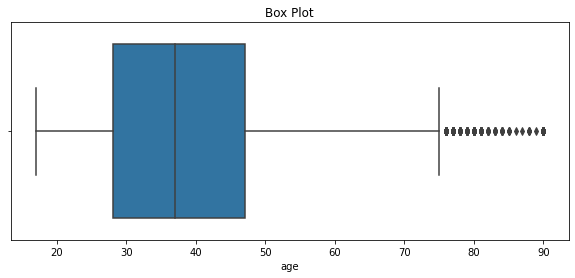

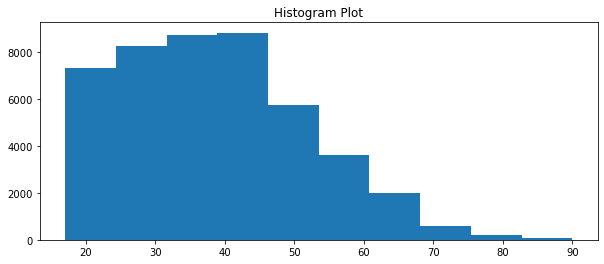

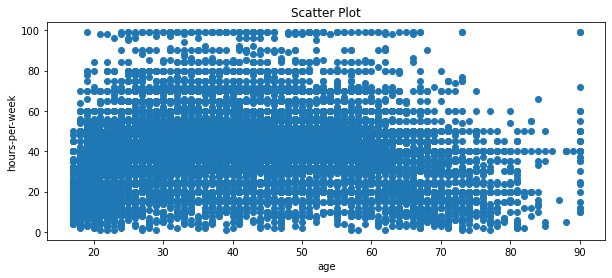

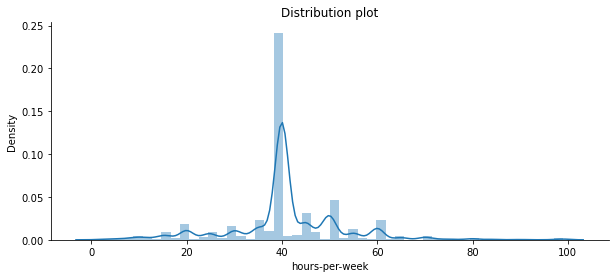

<Figure size 720x288 with 0 Axes>

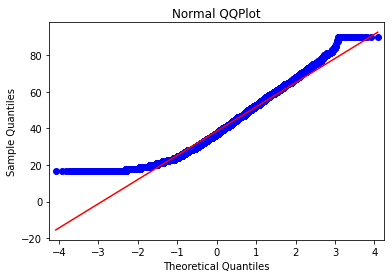

In [291]:
from statsmodels.graphics.gofplots import qqplot

def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(df['age'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(df['age'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('age')
    ax.set_ylabel('hours-per-week')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(df['age'],df['hours-per-week'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(df['hours-per-week'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(df['age'])

* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* It increases the error variance and reduces the power of statistical tests.
* If the outliers are non-randomly distributed, they can decrease normality.
* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model. There are some techniques used to deal with outliers.
1. Deleting observations.
2. Transforming values.
3. Imputation.
4. Separately treating

### DELETING OBSERVATIONS:

We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers. But deleting the observation is not a good idea when we have small dataset.

In [292]:
df_1=df.copy()

In [293]:
df_1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


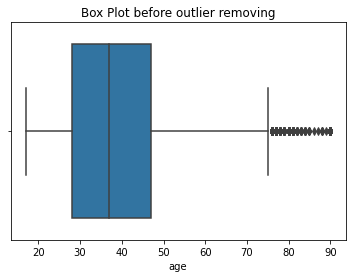

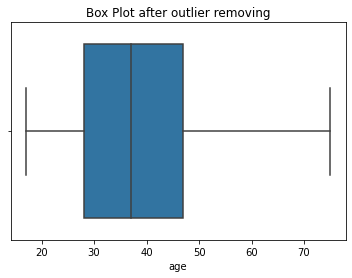

In [294]:
sns.boxplot(df_1['age'])
plt.title("Box Plot before outlier removing")
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
    
drop_outliers(df_1, 'age')
sns.boxplot(df_1['age'])
plt.title("Box Plot after outlier removing")
plt.show()

# TRANSFORMING VALUES:


Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values.
1. Scalling
2. Log transformation
3. Cube Root Normalization
4. Box-Cox transformation
* These techniques convert values in the dataset to smaller values.
* If the data has to many extreme values or skewed, this method helps to make your data normal.
* But These technique not always give you the best results.
* There is no lose of data from these methods.
* In all these method boxcox transformation gives the best result.

In [295]:
df_1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

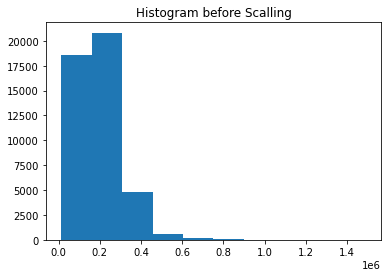

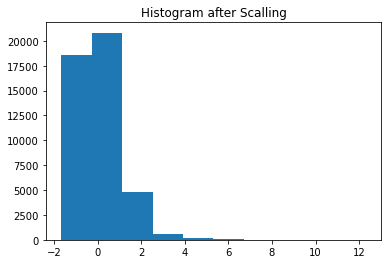

In [296]:
from sklearn import preprocessing

plt.hist(df_1['fnlwgt'])
plt.title("Histogram before Scalling")
plt.show()
scaler = preprocessing.StandardScaler()
df_1['fnlwgt'] = scaler.fit_transform(df_1['fnlwgt'].values.reshape(-1,1))
plt.hist(df_1['fnlwgt'])
plt.title("Histogram after Scalling")
plt.show()

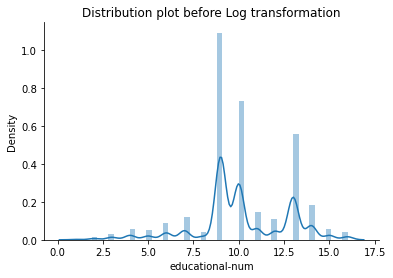

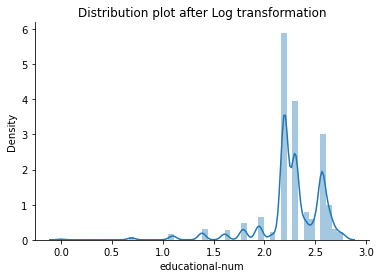

In [297]:
sns.distplot(df_1['educational-num'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
df_1['educational-num'] = np.log(df_1['educational-num'])
sns.distplot(df_1['educational-num'])
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

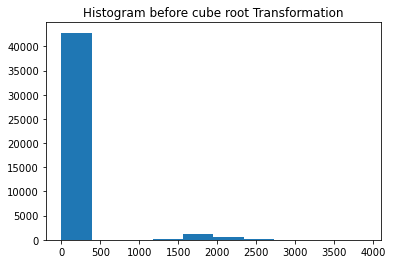

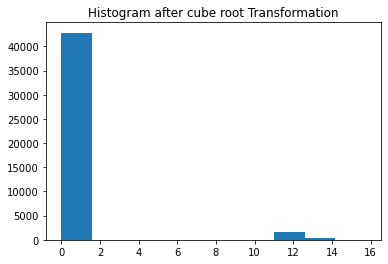

In [298]:
plt.hist(df_1['capital-loss'])
plt.title("Histogram before cube root Transformation")
plt.show()
df_1['capital-loss'] = (df_1['capital-loss']**(1/3))
plt.hist(df_1['capital-loss'])
plt.title("Histogram after cube root Transformation")
plt.show()

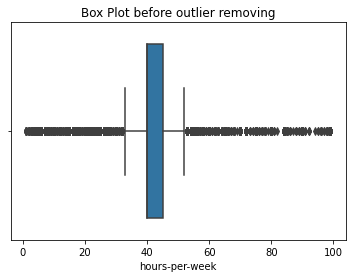

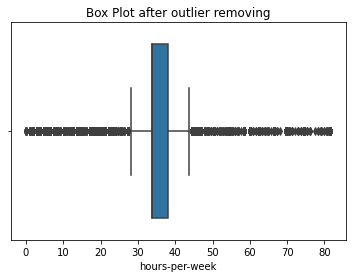

In [299]:
import scipy
sns.boxplot(df_1['hours-per-week'])
plt.title("Box Plot before outlier removing")
plt.show()
df_1['hours-per-week'],fitted_lambda= scipy.stats.boxcox(df_1['hours-per-week'] ,lmbda=None)
sns.boxplot(df_1['hours-per-week'])
plt.title("Box Plot after outlier removing")
plt.show()

## IMPUTATION

Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data. Here median is appropriate because it is not affected by outliers.

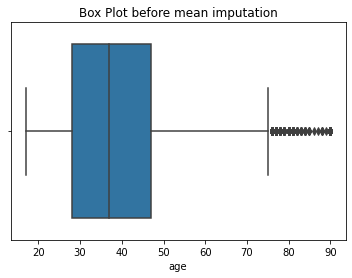

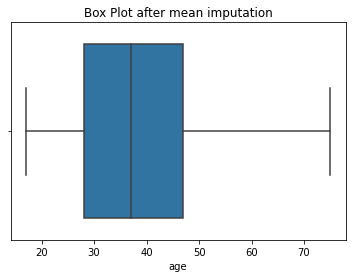

In [300]:
sns.boxplot(df['age'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df['age'])
for i in df['age']:
    if i > Upper_tail or i < Lower_tail:
            df['age'] = df['age'].replace(i, m)
sns.boxplot(df['age'])
plt.title("Box Plot after mean imputation")
plt.show()   

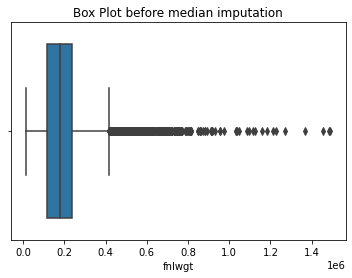

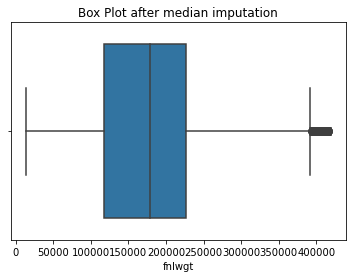

In [301]:
#median imputation

sns.boxplot(df['fnlwgt'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['fnlwgt'].quantile(0.25)
q3 = df['fnlwgt'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['fnlwgt'])
for i in df['fnlwgt']:
    if i > Upper_tail or i < Lower_tail:
            df['fnlwgt'] = df['fnlwgt'].replace(i, med)
sns.boxplot(df['fnlwgt'])
plt.title("Box Plot after median imputation")
plt.show()   

In [302]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

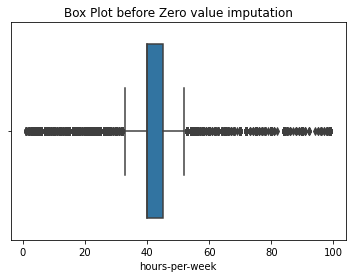

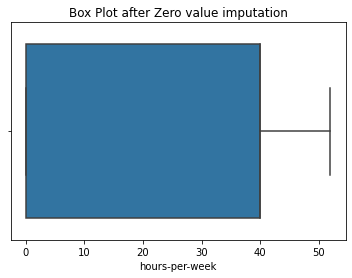

In [303]:
#Zero value imputation

sns.boxplot(df['hours-per-week'])
plt.title("Box Plot before Zero value imputation")
plt.show()
q1 = df['hours-per-week'].quantile(0.25)
q3 = df['hours-per-week'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df['hours-per-week']:
    if i > Upper_tail or i < Lower_tail:
            df['hours-per-week'] = df['hours-per-week'].replace(i, 0)
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot after Zero value imputation")
plt.show()            

In [343]:
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.038991,0.543934,-1.221559,-0.146733,-0.21878,0.500676,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.023044,-1.041059,-0.438122,-0.146733,-0.21878,1.036906,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.804541,1.818392,0.737034,-0.146733,-0.21878,0.500676,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.445855,-0.225248,-0.046403,0.877467,-0.21878,0.500676,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.335643,0.218704,-1.613277,-0.146733,-0.21878,-1.644244,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.882691,0.896828,0.737034,-0.146733,-0.21878,0.393430,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45218,0.133256,-0.294080,-0.438122,-0.146733,-0.21878,0.500676,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45219,1.539952,-0.322589,-0.438122,-0.146733,-0.21878,0.500676,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45220,-1.273440,0.251066,-0.438122,-0.146733,-0.21878,-1.644244,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Data Prepration

In [304]:
numerical = df.select_dtypes(include = ['int64','float64'])

In [305]:
numerical.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25.0,226802,7,0,0,40
1,38.0,89814,9,0,0,50
2,28.0,336951,12,0,0,40
3,44.0,160323,10,7688,0,40
5,34.0,198693,6,0,0,0


In [306]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df_num = pd.DataFrame(scale.fit_transform(numerical),columns = numerical.columns)

In [307]:
df_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.038991,0.543934,-1.221559,-0.146733,-0.21878,0.500676
1,-0.023044,-1.041059,-0.438122,-0.146733,-0.21878,1.036906
2,-0.804541,1.818392,0.737034,-0.146733,-0.21878,0.500676
3,0.445855,-0.225248,-0.046403,0.877467,-0.21878,0.500676
4,-0.335643,0.218704,-1.613277,-0.146733,-0.21878,-1.644244


In [308]:
categorical = df.select_dtypes(include = ['object'])

In [310]:
categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [311]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse = False)

df_cat = pd.DataFrame(enc.fit_transform(categorical),columns = enc.get_feature_names(categorical.columns))

In [312]:
df_cat.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [313]:
df = pd.concat([df_num,df_cat], axis = 1)

In [314]:
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,-1.038991,0.543934,-1.221559,-0.146733,-0.21878,0.500676,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.023044,-1.041059,-0.438122,-0.146733,-0.21878,1.036906,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.804541,1.818392,0.737034,-0.146733,-0.21878,0.500676,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.445855,-0.225248,-0.046403,0.877467,-0.21878,0.500676,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.335643,0.218704,-1.613277,-0.146733,-0.21878,-1.644244,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


By these visualizations, we can deduce some correlations between our independent attributes and dependent attribute:

Adults with an educational background of Prof-school (7) and Doctorate (10) will have a better income and it is likely possible that their income is higher than 50K.
Our data suggest that people with occupation Prof-specialty (5) and Exec-managerial (7) will have a better chance of earning an income of more than 50K.
The gender bar chart provides us some useful insight into the data that Men (0) are more likely to have a higher income.
relationship chart shows us that wife (1) and husband (4) has a higher income. A married couple would most likely earn >50K.
As per the data, an Asian-Pac-Islander (1) or a white (3) have more chances of earning more than 50K.
Self-emp-in (0), Federal-gov(2) workclass groups have a higher chance of earning more than 50K.

In [323]:
y = df.pop('income_>50K')
X = df

In [324]:
X.pop('income_<=50K')

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
45217    1.0
45218    0.0
45219    1.0
45220    1.0
45221    0.0
Name: income_<=50K, Length: 45222, dtype: float64

In [325]:
y

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
45217    0.0
45218    1.0
45219    0.0
45220    0.0
45221    1.0
Name: income_>50K, Length: 45222, dtype: float64

In [326]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

# Training the Model

In [327]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train,y_train)

LogisticRegression()

In [328]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()

clf_NB.fit(X_train,y_train)

GaussianNB()

# Testing

In [329]:
y_pred = clf.predict(X_test)

In [330]:
y_pred_NB = clf_NB.predict(X_test)

# Model Evaluation

In [331]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_pred)

0.8412324021522812

In [332]:
metrics.accuracy_score(y_test,y_pred_NB)

0.6281418146974276

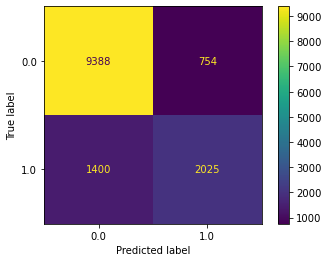

In [333]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

In [334]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10142
         1.0       0.73      0.59      0.65      3425

    accuracy                           0.84     13567
   macro avg       0.80      0.76      0.77     13567
weighted avg       0.83      0.84      0.84     13567



In [335]:
1380/(1380+2045)

0.4029197080291971

In [336]:
9380/(9380+762)

0.9248668901597318

In [337]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth = 3)

clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [338]:
y_pred_dt = clf_dt.predict(X_test)
metrics.accuracy_score(y_test,y_pred_dt)

0.8321662858406428

In [339]:
# SVM

from sklearn.svm import SVC

clf_svm = SVC()

clf_svm.fit(X_train,y_train)

SVC()

In [340]:
y_pred_svm = clf_svm.predict(X_test)
metrics.accuracy_score(y_test,y_pred_svm)

0.8473501879560699

In [341]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 6)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [342]:
y_pred_knn = clf_knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred_knn)

0.8260485000368541

In [184]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth = 20)

clf_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [185]:
y_pred_rf = clf_rf.predict(X_test)
metrics.accuracy_score(y_test,y_pred_rf)

0.8541313481241247

In [186]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

clf_ab = AdaBoostClassifier(n_estimators = 100)

clf_ab.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [187]:
y_pred_ab = clf_ab.predict(X_test)
metrics.accuracy_score(y_test,y_pred_ab)

0.853910223336036

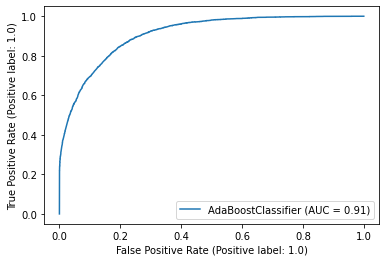

In [188]:
metrics.plot_roc_curve(clf_ab, X_test, y_test)

In [189]:
data = {'ML_Algorithms':  ['Adaboost', 'RandomForestClassifier', 'KNeighborsClassifier','SVM','Decision tree','Naive','LogisticReg'],
        'Accuracy': ['0.853910223336036', '0.8541313481241247', '0.8260485000368541','0.8473501879560699','0.8321662858406428','0.6281418146974276','0.8412324021522812'
                    ]}

In [191]:
df_al=pd.DataFrame(data)

In [192]:
df_al

,ML_Algorithms,Accuracy
0,Adaboost,0.853910223336036
1,RandomForestClassifier,0.8541313481241247
2,KNeighborsClassifier,0.8260485000368541
3,SVM,0.8473501879560699
4,Decision tree,0.8321662858406428
5,Naive,0.6281418146974276
6,LogisticReg,0.8412324021522812
